# Multivariate Source Use Case (Single DataFrameCase)

In this vignette I will represent a use case for the Source Multivariate Entropy Triangle with some individual Databases.

### Importing Libraries

We import the package entropytriangle, which will import the modules needed for the evaluation.

In [1]:
from entropytriangle import * #importing all modules necessary for the plotting

### Dowloading a set of Databases

In this case, the csv files for the use case, are stored locally.

In [2]:
#df = pd.read_csv('Arthritis.csv',delimiter=',',index_col='Unnamed: 0').drop(['ID'],axis = 1)
#df = pd.read_csv('Breast_data.csv',delimiter=',',index_col='Unnamed: 0').drop(['Sample code number'],axis = 1).replace('?',np.nan) # in this DB the missing values are represented as '?' 
#df = pd.read_csv('Glass.csv',delimiter=',')
#df = pd.read_csv('Ionosphere.csv',delimiter=',')
df = pd.read_csv('Iris.csv',delimiter=',',index_col='Id')
#df = pd.read_csv('Wine.csv',delimiter=',').drop(['Wine'],axis = 1)

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


### Discretizing the Data before entropy calculation

We have defined a function for discretizing a whole dataset, the function divides de entries in 
"NROWS(DF)^(1/3)" equally sized spaces, and turns the original continuous variables into categorical variables. 

In [5]:
df = discretization(df)

/Users/jaime.de.los.rios/anaconda3/lib/python3.6/site-packages/entropytriangle/auxfunc.py:51: UserWarning: Discretizing data!
  warning("Discretizing data!")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null category
SepalWidthCm     150 non-null category
PetalLengthCm    150 non-null category
PetalWidthCm     150 non-null category
Species          150 non-null category
dtypes: category(5)
memory usage: 2.8 KB


In [7]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,1,3,0,0,0
2,0,2,0,0,0
3,0,2,0,0,0
4,0,2,0,0,0
5,0,3,0,0,0
6,1,3,0,0,0
7,0,2,0,0,0
8,0,2,0,0,0
9,0,1,0,0,0


### Source Entropies Measures calculation

Once we have our data discretized, we will start by calculating the values of the entropies for the posterior plots:

In [8]:
'''
As the database is previosly discretized we won´t need the values of the bins
'Type variable select the entropy calculation:'
    Total: Total source entropy decomposition (CPx)
    Dual : Dual source entropy decomposition (DPx instead of CPx)
'''

edf = sentropies(df , type = 'total' , base = 2) 

In [9]:
edf

,H_Uxi,H_Pxi,DeltaH_Pxi,M_Pxi,VI_Pxi
Name,,,,,
SepalLengthCm,2.321928,2.200620,0.121308,1.417675,0.782945
SepalWidthCm,2.321928,1.841723,0.480205,0.917768,0.923955
PetalLengthCm,2.321928,1.995571,0.326357,1.738118,0.257453
PetalWidthCm,2.321928,2.137460,0.184468,1.654826,0.482635
Species,1.584963,1.584963,0.000000,1.465241,0.119721
AGGREGATE,10.872675,9.760337,1.112338,7.193628,2.566709


### Source Entropies Entropy Triangle Plotting

The last step will be plotting the values calculated previously. The coordinates will be calculated multiplying the normalized values needed by the scale used for plotting the triangle, and will appear behind the triangle plot for comparison:

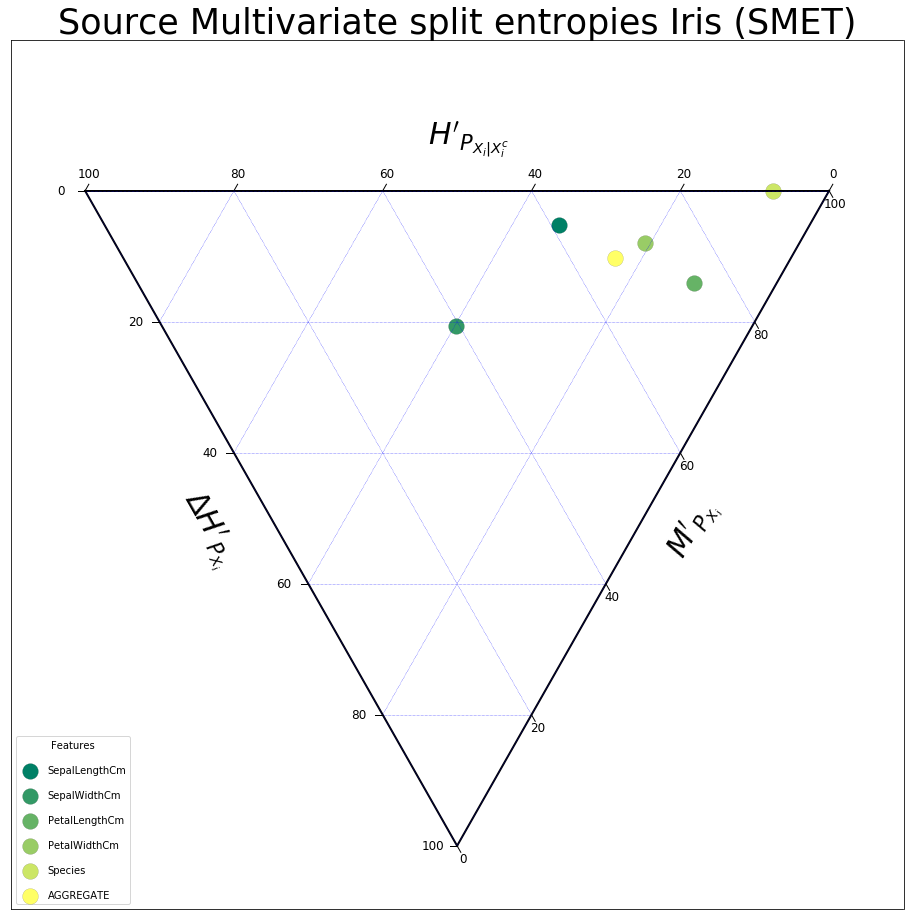

In [10]:
entriangle(edf,s_mk=250,scale= 100, pltscale=16 , ticks_size=12, gridl = 20, chart_title = "Source Multivariate split entropies Iris (SMET)")

Notice the varying degrees of redundanvy and balancedness of the different features (including the class).